1


C:\Users\lovca\AppData\Local\Temp\ipykernel_20456\768969815.py:120: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



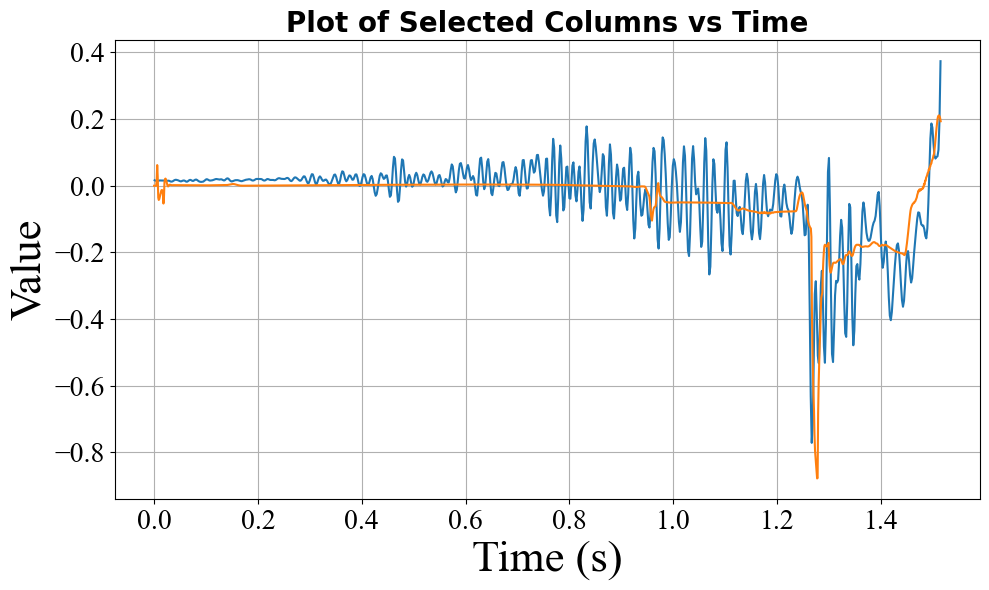

In [28]:
import mod as dp
import plotly.graph_objs as go

import pandas as pd

def process_data(filtered_df1, filtered_df2, selected_columns1, selected_columns2, start_time1):
    processed_data1 = filtered_df1.copy()-0.01
    processed_data2 = filtered_df2.copy()
    
    # Adjust time for Data Source 1
    processed_data1['t_adj'] = filtered_df1['t '] - start_time1
    
    # Adjust values for Data Source 2
    processed_data2[selected_columns2] = -filtered_df2[selected_columns2] / 1000 / 9.8
    
    return processed_data1, processed_data2

def create_figure(processed_data1, processed_data2, selected_columns1, selected_columns2):
    fig = go.Figure()
    
    # Plot data from the first data source
    for column in selected_columns1:
        fig.add_trace(go.Scatter(x=processed_data1['t_adj'], y=processed_data1[column], mode='lines', name=f'{column} (Data Source 1)'))
    
    # Plot data from the second data source
    for column in selected_columns2:
        fig.add_trace(go.Scatter(x=processed_data2['Time'], y=processed_data2[column], mode='lines', name=f'{column} (Data Source 2)'))
    
    # Update layout
    fig.update_layout(title="Plot of Selected Columns vs Time", xaxis_title="Time", yaxis_title="Value")
    
    return fig



import matplotlib.pyplot as plt


def create_figure2(processed_data1, processed_data2, selected_columns1, selected_columns2):
    fig, ax = plt.subplots(figsize=(10, 6))
    textstyle = {'family': 'Times New Roman', 'size': 32}
    tick_fontsize = 20
    tick_font = 'Times New Roman'
    
    # Plot data from the first data source
    for column in selected_columns1:
        ax.plot(processed_data1['t_adj'], processed_data1[column], label=f'{column} (Data Source 1)')
    
    # Plot data from the second data source
    for column in selected_columns2:
        ax.plot(processed_data2['Time'], processed_data2[column], label=f'{column} (Data Source 2)')
    
    # Add title and labels
    ax.set_title('Plot of Selected Columns vs Time', fontsize=20, fontweight='bold')
    ax.set_xlabel('Time (s)', fontdict=textstyle)
    ax.set_ylabel('Value', fontdict=textstyle)
    
    # Customize legend
    #ax.legend(loc='upper left',fontdict=textstyle)
    
    # Set background color
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Remove grid
    ax.grid(True)
    
    # Add axis lines
    #ax.axhline(y=0, color='black', linewidth=1.3)
    #ax.axvline(x=0, color='black', linewidth=1.3)
    
    # Set tick parameters
    plt.xticks(fontsize=tick_fontsize, fontfamily=tick_font)
    plt.yticks(fontsize=tick_fontsize, fontfamily=tick_font)
    
    plt.tight_layout()
    
    return fig


# Define paths
path1 = r"C:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\MR_door (run 29)_out2.csv"
path2 = r"C:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\7\request_ACC_door U3_export.csv"

# Load data
df1, df2 = dp.load_data(path1, path2)

# Define parameters
selected_columns1 = ['acc@A7_Y.RN_6']
start_time1 = 98.415
end_time1 = 99.930
selected_columns2 = ['413.asc','414.asc','415.asc','416.asc','417.asc','418.asc','419.asc']
selected_columns2 = ['413.asc']# Replace with actual column names
start_time2 = 0
end_time2 = 1.515
data_amount = 8
smoothing_method = 'Fourier Filter'
#smoothing_method = ''
smoothing_method =  'Rolling Mean'
window_sizes1 = [1]*9
window_sizes2 = [12]*9
#window_sizes1 = [1]*9
#window_sizes2 = [6]*9
# Filter data
filtered_df1, filtered_df2, selected_columns1, selected_columns2 = dp.filter_data(df1, df2, start_time1, end_time1, start_time2, end_time2, selected_columns1, selected_columns2, data_amount)

# Apply scaling
filtered_df1 = dp.apply_scaling(filtered_df1, selected_columns1)

# Apply smoothing
filtered_df1, filtered_df2 = dp.apply_smoothing(filtered_df1, filtered_df2, selected_columns1, selected_columns2, smoothing_method, window_sizes1, window_sizes2)

# Process the data
processed_data1, processed_data2 = process_data(filtered_df1, filtered_df2, selected_columns1, selected_columns2, start_time1)

# Create the plot
fig = create_figure2(processed_data1, processed_data2, selected_columns1, selected_columns2)
#p = create_figure3(processed_data1, processed_data2, selected_columns1, selected_columns2)
# Show the plot
fig.show()
#show(p)
